## Strategy for Learning Rate decay

- First experiment: start with fixed learning rate
- Second experiment: introduce Keras scheduler with the alpha_init / epochs rule
- Continuing: maybe introduce a step based decay which is what we show here

In [26]:
# import the necessary packages
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report
from ndl.nn.conv import MiniVGGNet
from keras.callbacks import LearningRateScheduler
from keras.optimizers import SGD
from keras.datasets import cifar10
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

%matplotlib inline
sns.set()

In [27]:
lrs = []

def step_decay(epoch):
    # initialize the base initial learning rate, drop factor, and
    # epochs to drop every
    initAlpha = 0.01
    factor = 0.25
    dropEvery = 5

    # compute learning rate for the current epoch
    alpha = initAlpha * (factor ** np.floor((1 + epoch) / dropEvery))

    lrs.append(float(alpha))
    
    # return the learning rate
    return float(alpha)

In [28]:
# load the training and testing data, then scale it into the
# range [0, 1]
print("[INFO] loading CIFAR-10 data...")
((trainX, trainY), (testX, testY)) = cifar10.load_data()
trainX = trainX.astype("float") / 255.0
testX = testX.astype("float") / 255.0

[INFO] loading CIFAR-10 data...


In [29]:
# convert the labels from integers to vectors
lb = LabelBinarizer()
trainY = lb.fit_transform(trainY)
testY = lb.transform(testY)

In [30]:
# initialize the label names for the CIFAR-10 dataset
labelNames = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

In [31]:
# define the set of callbacks to be passed to the model during
# training
callbacks = [LearningRateScheduler(step_decay)]

In [32]:
# initialize the optimizer and model
opt = SGD(lr=0.01, momentum=0.9, nesterov=True)
model = MiniVGGNet.build(width=32, height=32, depth=3, classes=10)
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

In [33]:
# train the network
epochs = 40
H = model.fit(trainX, trainY, validation_data=(testX, testY), batch_size=64, epochs=epochs, callbacks=callbacks, verbose=1)

Train on 50000 samples, validate on 10000 samples
Epoch 1/40
50000/50000 [==============================] - 12s 247us/step - loss: 1.6837 - acc: 0.4405 - val_loss: 1.3804 - val_acc: 0.5173
Epoch 2/40
50000/50000 [==============================] - 12s 233us/step - loss: 1.2093 - acc: 0.5839 - val_loss: 1.0741 - val_acc: 0.6127
Epoch 3/40
50000/50000 [==============================] - 12s 233us/step - loss: 1.0004 - acc: 0.6536 - val_loss: 0.9246 - val_acc: 0.6770
Epoch 4/40
50000/50000 [==============================] - 12s 234us/step - loss: 0.8880 - acc: 0.6922 - val_loss: 0.7766 - val_acc: 0.7287
Epoch 5/40
50000/50000 [==============================] - 12s 234us/step - loss: 0.7394 - acc: 0.7416 - val_loss: 0.6805 - val_acc: 0.7638
Epoch 6/40
50000/50000 [==============================] - 12s 233us/step - loss: 0.6840 - acc: 0.7586 - val_loss: 0.6413 - val_acc: 0.7809
Epoch 7/40
50000/50000 [==============================] - 12s 234us/step - loss: 0.6563 - acc: 0.7682 - val_loss: 0.

In [34]:
# evaluate the network
print("[INFO] evaluating network...")
predictions = model.predict(testX, batch_size=32)
c_report = classification_report(testY.argmax(axis=1), predictions.argmax(axis=1), target_names=labelNames)
print(c_report)

[INFO] evaluating network...
             precision    recall  f1-score   support

   airplane       0.85      0.81      0.83      1000
 automobile       0.92      0.89      0.91      1000
       bird       0.72      0.68      0.69      1000
        cat       0.66      0.60      0.63      1000
       deer       0.73      0.80      0.76      1000
        dog       0.72      0.72      0.72      1000
       frog       0.79      0.89      0.84      1000
      horse       0.87      0.84      0.85      1000
       ship       0.88      0.91      0.89      1000
      truck       0.86      0.89      0.88      1000

avg / total       0.80      0.80      0.80     10000



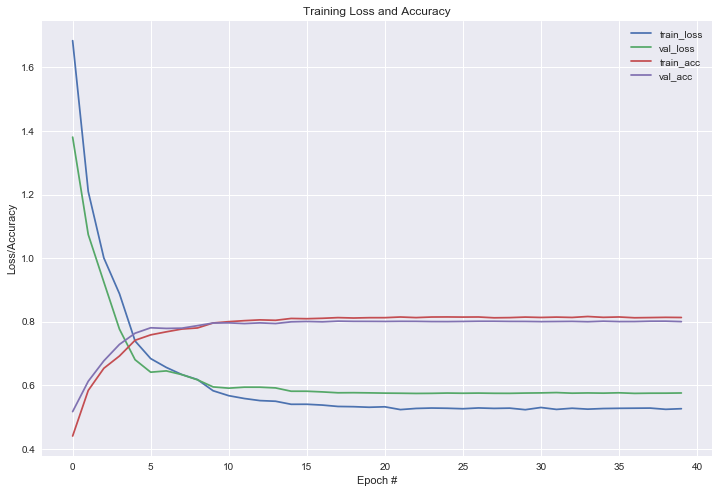

In [35]:
from ndl.utils.plot import plotKerasReport
plotKerasReport(H, epochs)

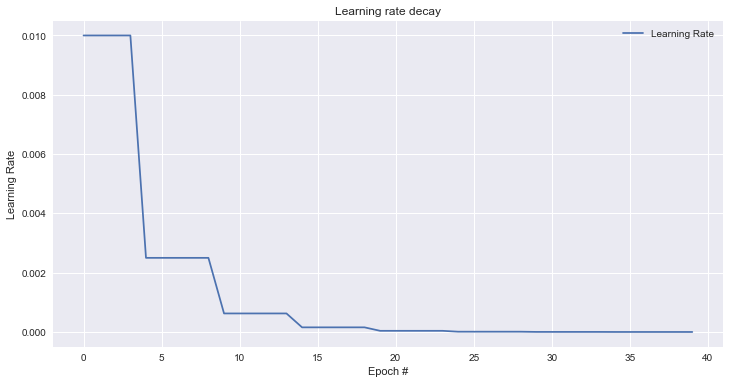

In [36]:
plt.figure(figsize=(12,6))
plt.plot(np.arange(0, epochs), lrs, label="Learning Rate")
plt.title("Learning rate decay")
plt.xlabel("Epoch #")
plt.ylabel("Learning Rate")
plt.legend()

Notice the accuracy and loss pretty much stagnate after epoch 15 due to a very fast drop of the learning rate. After epoch 15 the lr is about 0.00125 meaning the network takes very small steps along the loss landscape. We can affect this behavior by implementing a slower rate drop (in this case **increasing** the **factor** parameter in our step function to 0.5

In [37]:
lrs_slower = []

def step_decay_slower(epoch):
    # initialize the base initial learning rate, drop factor, and
    # epochs to drop every
    initAlpha = 0.01
    factor = 0.5
    dropEvery = 5

    # compute learning rate for the current epoch
    alpha = initAlpha * (factor ** np.floor((1 + epoch) / dropEvery))

    lrs_slower.append(float(alpha))
    
    # return the learning rate
    return float(alpha)

In [38]:
# define the set of callbacks to be passed to the model during
# training
callbacks = [LearningRateScheduler(step_decay_slower)]

# initialize the optimizer and model
opt = SGD(lr=0.01, momentum=0.9, nesterov=True)
model = MiniVGGNet.build(width=32, height=32, depth=3, classes=10)
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

# train the network
epochs = 40
H = model.fit(trainX, trainY, validation_data=(testX, testY), batch_size=64, epochs=epochs, callbacks=callbacks, verbose=1)

Train on 50000 samples, validate on 10000 samples
Epoch 1/40
50000/50000 [==============================] - 12s 250us/step - loss: 1.7292 - acc: 0.4240 - val_loss: 1.2331 - val_acc: 0.5610
Epoch 2/40
50000/50000 [==============================] - 12s 234us/step - loss: 1.2334 - acc: 0.5745 - val_loss: 1.1863 - val_acc: 0.5886
Epoch 3/40
50000/50000 [==============================] - 12s 234us/step - loss: 1.0235 - acc: 0.6447 - val_loss: 1.0010 - val_acc: 0.6596
Epoch 4/40
50000/50000 [==============================] - 12s 235us/step - loss: 0.9088 - acc: 0.6822 - val_loss: 0.8449 - val_acc: 0.7070
Epoch 5/40
50000/50000 [==============================] - 12s 236us/step - loss: 0.7645 - acc: 0.7300 - val_loss: 0.7313 - val_acc: 0.7449
Epoch 6/40
50000/50000 [==============================] - 12s 233us/step - loss: 0.7084 - acc: 0.7503 - val_loss: 0.6791 - val_acc: 0.7633
Epoch 7/40
50000/50000 [==============================] - 12s 233us/step - loss: 0.6687 - acc: 0.7635 - val_loss: 0.

In [39]:
# evaluate the network
print("[INFO] evaluating network...")
predictions = model.predict(testX, batch_size=32)
c_report = classification_report(testY.argmax(axis=1), predictions.argmax(axis=1), target_names=labelNames)
print(c_report)

[INFO] evaluating network...
             precision    recall  f1-score   support

   airplane       0.83      0.82      0.82      1000
 automobile       0.93      0.90      0.91      1000
       bird       0.77      0.69      0.73      1000
        cat       0.67      0.63      0.65      1000
       deer       0.73      0.81      0.77      1000
        dog       0.73      0.76      0.75      1000
       frog       0.84      0.88      0.86      1000
      horse       0.86      0.84      0.85      1000
       ship       0.90      0.90      0.90      1000
      truck       0.86      0.91      0.89      1000

avg / total       0.81      0.81      0.81     10000



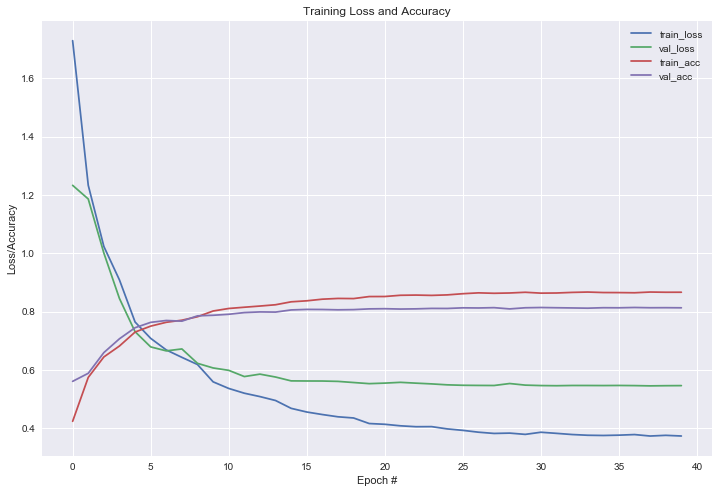

In [40]:
from ndl.utils.plot import plotKerasReport
plotKerasReport(H, epochs)

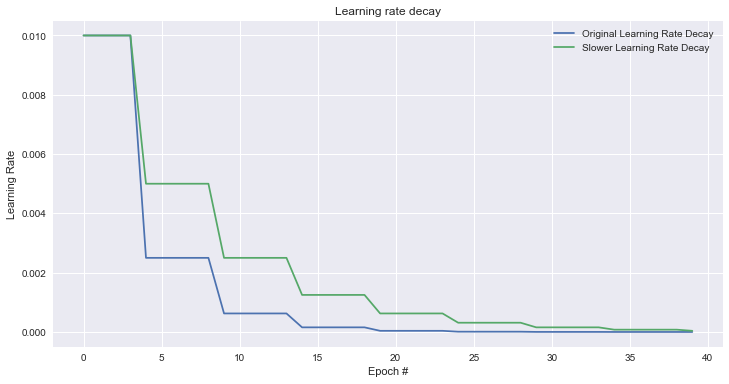

In [42]:
plt.figure(figsize=(12,6))
plt.plot(np.arange(0, epochs), lrs, label="Original Learning Rate Decay")
plt.plot(np.arange(0, epochs), lrs_slower, label="Slower Learning Rate Decay")
plt.title("Learning rate decay")
plt.xlabel("Epoch #")
plt.ylabel("Learning Rate")
plt.legend();

With the slower drop in learning rate we achieve higher accuracy and the network continues learning past epoch 25 until it finally stagnates at around 30. At this point the learning rate is very small and is unable to make any significant changes to the weights.